1/1 [==============================] - 0s 11ms/step


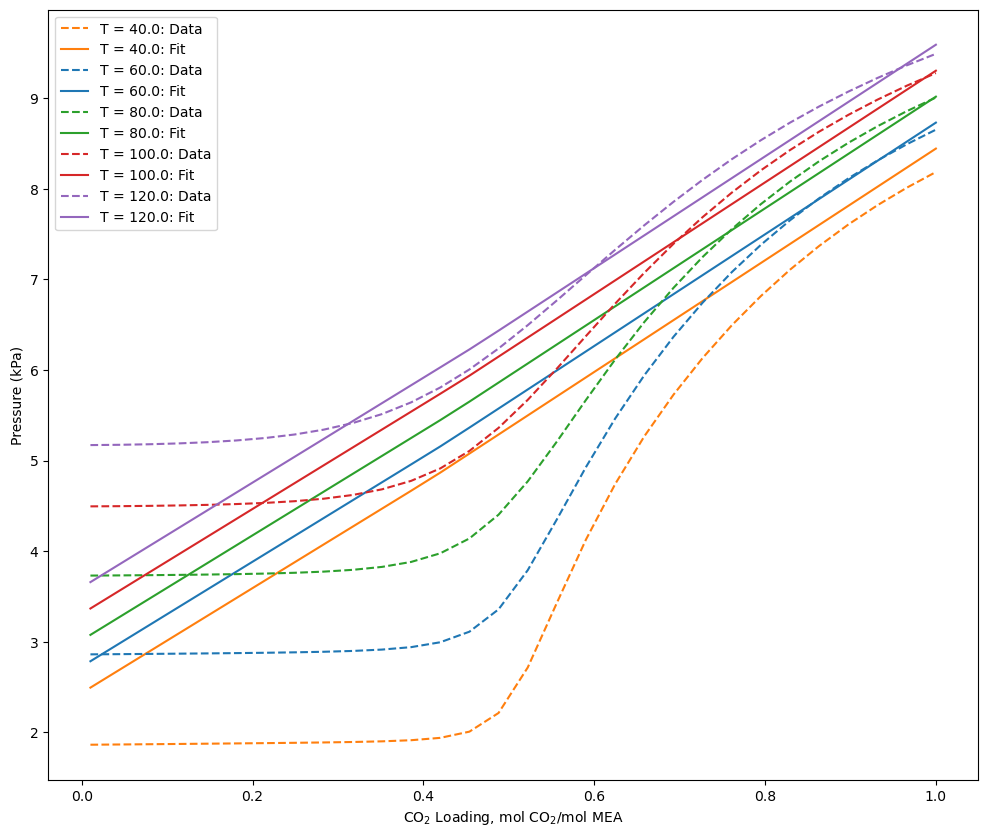

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('interpolation_data.csv')
alpha = df['loading'].to_numpy()
temperature = df['temperature'].to_numpy()
pressure = df['Pressure'].to_numpy()
X = np.column_stack((alpha, temperature+273.15))
y = pressure

# Create the neural network model
model = Sequential()
model.add(Dense(300, input_dim=2, activation='relu'))  # Two input features
model.add(Dense(1))  # One output

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X, np.log(y), epochs=500, verbose=0)

# Print predictions
T_range = df['temperature'].unique()
fig, axs = plt.subplots(figsize=(12, 10))
mfc2 = ['tab:orange', 'tab:blue', 'tab:green', 'tab:red', 'tab:purple']
for i, T in enumerate(T_range):
    df_cut_1 = df[df['temperature'] == T]
    
    loading_cut = df_cut_1['loading'].to_numpy()

    temperature_cut = np.ones_like(loading_cut)*T

    pressure_cut = df_cut_1['Pressure'].to_numpy()
    X_cut = np.column_stack((loading_cut, temperature_cut+273.15))
    y_pred = model.predict(X_cut)
    
    axs.plot(loading_cut, np.log(pressure_cut), '--',
             label=f'T = {T}: Data', color=mfc2[i])
    axs.plot(loading_cut, y_pred,
             label=f'T = {T}: Fit', color=mfc2[i])
    axs.legend()
    axs.set_xlabel("CO$_{2}$ Loading, mol CO$_{2}$/mol MEA")
    axs.set_ylabel("Pressure (kPa)")
    # axs.set_yscale('log')
plt.show()

Coefficients: [  6.4295912  201.98891486  -4.08237798 -56.3613488  202.60180244]


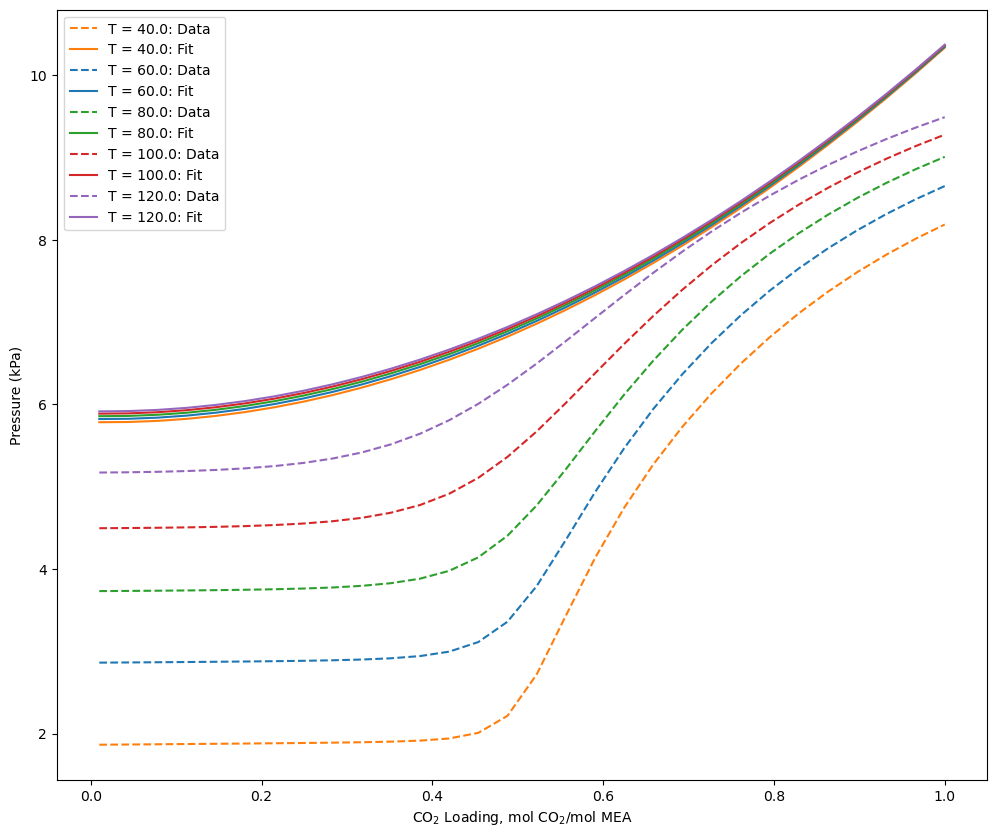

In [29]:

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define a custom model for two input variables
def model(X, a, b, c, d, e):
    loading, T = X
    return a - b/T  - c*loading**2 + d*loading/T + e*loading**2/T

# Input variables and output variable
df = pd.read_csv('interpolation_data.csv')
alpha = df['loading'].to_numpy()
temperature = df['temperature'].to_numpy()
pressure = df['Pressure'].to_numpy()
x1 = alpha
x2 = temperature
y = np.log(pressure)
# Fit the curve
popt, pcov = curve_fit(model, (x1, x2), y)

# Coefficients
print("Coefficients:", popt)

# Predict new values
y_pred = model((x1, x2), *popt)

# Print predictions
T_range = df['temperature'].unique()
fig, axs = plt.subplots(figsize=(12, 10))
mfc2 = ['tab:orange', 'tab:blue', 'tab:green', 'tab:red', 'tab:purple']
for i, T in enumerate(T_range):
    df_cut_1 = df[df['temperature'] == T]
    
    loading_cut = df_cut_1['loading'].to_numpy()
    temperature_cut = np.ones_like(loading_cut)*T
    pressure_cut = df_cut_1['Pressure'].to_numpy()
    x1 = loading_cut
    x2 = temperature_cut + 273.15
    y_pred = model((x1, x2), *popt)
    
    axs.plot(loading_cut, np.log(pressure_cut), '--',
             label=f'T = {T}: Data', color=mfc2[i])
    axs.plot(loading_cut, y_pred,
             label=f'T = {T}: Fit', color=mfc2[i])
    axs.legend()
    axs.set_xlabel("CO$_{2}$ Loading, mol CO$_{2}$/mol MEA")
    axs.set_ylabel("Pressure (kPa)")
    # axs.set_yscale('log')
plt.show()

C:\Users\Tanner\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Tanner\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Tanner\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Tanner\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Tanner\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


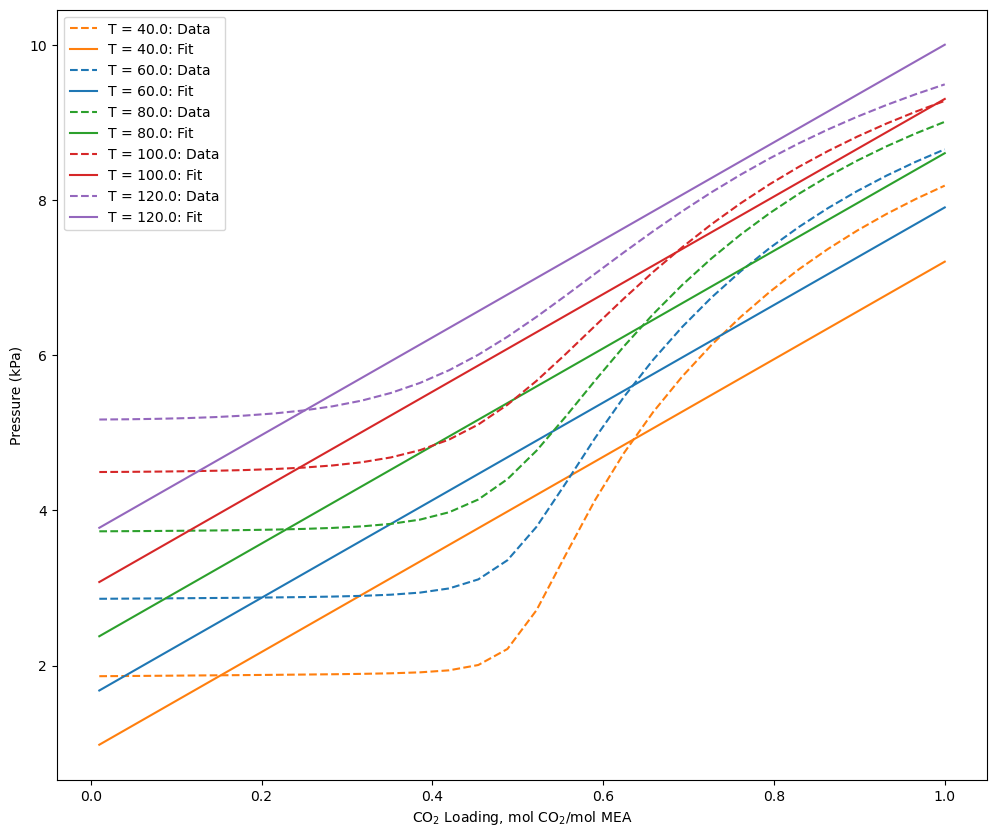

In [25]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Input variables and output variable
df = pd.read_csv('interpolation_data.csv')
alpha = df['loading'].to_numpy()
temperature = df['temperature'].to_numpy()
pressure = df['Pressure'].to_numpy()
x1 = alpha
x2 = temperature
# Sample data
X = pd.DataFrame({
    'X1': alpha,
    'X2': temperature+273.15
})
y = np.log(pressure)

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Print predictions
T_range = df['temperature'].unique()
fig, axs = plt.subplots(figsize=(12, 10))
mfc2 = ['tab:orange', 'tab:blue', 'tab:green', 'tab:red', 'tab:purple']
for i, T in enumerate(T_range):
    df_cut_1 = df[df['temperature'] == T]
    
    loading_cut = df_cut_1['loading'].to_numpy()
    temperature_cut = np.ones_like(loading_cut)*T
    pressure_cut = df_cut_1['Pressure'].to_numpy()
    x1 = loading_cut
    x2 = temperature_cut + 273.15
    X = np.column_stack((x1, x2))
    y_pred = model.predict(X)
    
    axs.plot(loading_cut, np.log(pressure_cut), '--',
             label=f'T = {T}: Data', color=mfc2[i])
    axs.plot(loading_cut, y_pred,
             label=f'T = {T}: Fit', color=mfc2[i])
    axs.legend()
    axs.set_xlabel("CO$_{2}$ Loading, mol CO$_{2}$/mol MEA")
    axs.set_ylabel("Pressure (kPa)")
    # axs.set_yscale('log')
plt.show()
